### "Unanalyzed data is just a pile of numbers"

### Barbara Minto

EDA - is the initial stage of data analysis that focuses on discovering patterns, relationships, and trends in the data. EDA involves the use of visual and statistical methods to explore and summarize the data, and to generate hypothesis that can be further tested using more advanced statistical techniques.

For this analysis, we will be using the bestseller books dataset from Amazon, which contains information on the top selling books in various categories. We will start by exploring the dataset to gain an understanding of its structure and content, and then use visualizations and statistical techniques to explore relationships between variables.

We will begin by looking at basic statistics of the dataset, such as mean, median, and standard deviation, as well as examining the distribution of varaibles using histograms and box plots. Then, we will use bar charts to visualize the frequency of categorical variables, such as genre , and examine the relationship between genre and book reviews using bar charts and box plots.

Additionally, we will explore the relationship between price and genre using a box plot and examine the top 20 best-selling authors by reviews using a bar chart.Finally, we will explore the relationship between price and book reviews by creating price ranges and examining the mean reviews for each range using a box plot. 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

 #### Reading and understanding the dataset

In [2]:
bestseller_books = pd.read_csv('bestsellers_with_categories_2022_03_27.csv')

In [3]:
bestseller_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


In [4]:
bestseller_books.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2022,Fiction
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929,10,2022,Fiction
697,Verity,Colleen Hoover,4.6,71826,11,2022,Fiction
698,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,13,2022,Non Fiction
699,Where the Crawdads Sing,Delia Owens,4.8,208917,10,2022,Fiction


In [5]:
bestseller_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


### Getting insights and visualizations

Use describe() or describe().T

#### Numerical Feature Statistic

In [6]:
bestseller_books.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,700.0,4.639857,0.218586,3.3,4.50,4.7,4.8,4.9
Reviews,700.0,19255.195714,23613.443875,37.0,4987.25,10284.0,23358.0,208917.0
Price,700.0,12.700000,9.915162,0.0,7.00,11.0,15.0,105.0
Year,700.0,2015.500000,4.034011,2009.0,2012.00,2015.5,2019.0,2022.0


#### Categorical Feature Statistics

In [7]:
bestseller_books.describe(include='object')

,Name,Author,Genre
count,700,700,700
unique,441,305,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,14,388


In [8]:
# Using value_count() to count

genre_counts=bestseller_books.Genre.value_counts()
genre_counts

Non Fiction    388
Fiction        312
Name: Genre, dtype: int64

#### Visualizing it using seaborn's countplot function

<Axes: title={'center': 'Fiction vs Non Fiction'}, xlabel='Genre', ylabel='count'>

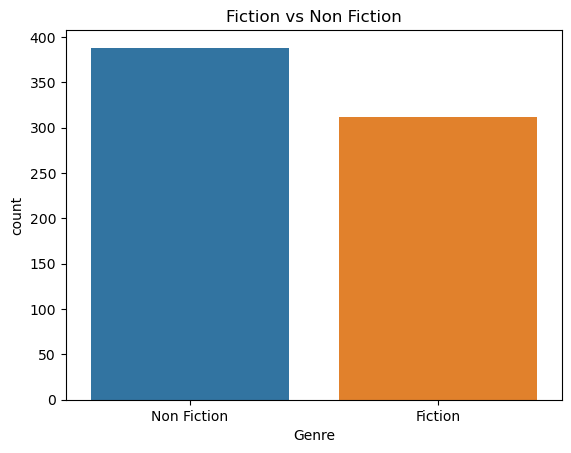

In [9]:
plt.title('Fiction vs Non Fiction')
sns.countplot(x='Genre', data=bestseller_books)

We can also implement boxplots for visualizing the distribution of books across various features, as an example here, the price distribution of books is shown across the genre and price

<Axes: title={'center': 'Genre v/s Reviews'}, xlabel='Genre', ylabel='Reviews'>

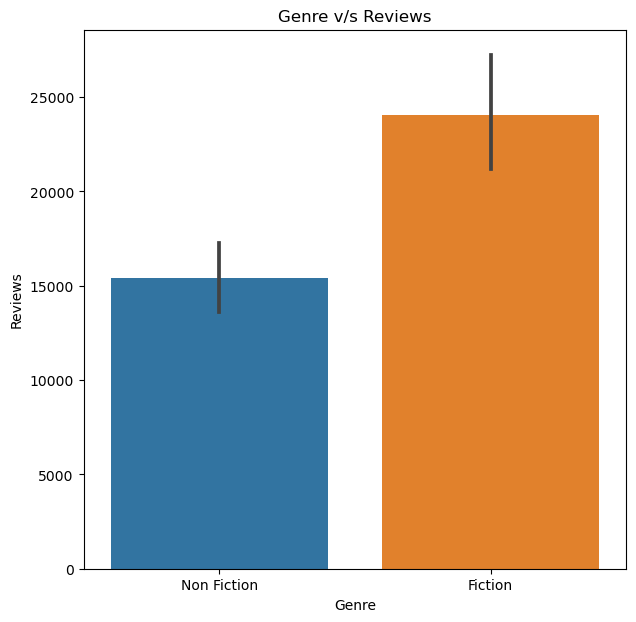

In [10]:
plt.figure(figsize=(7, 7))
plt.title("Genre v/s Reviews")
sns.barplot(x='Genre',
           y='Reviews',
           data = bestseller_books)

We can also implement boxplots for visualizing the distribution of books across vrious features, as an example here. the price distribution of books is shown across the genre and price.

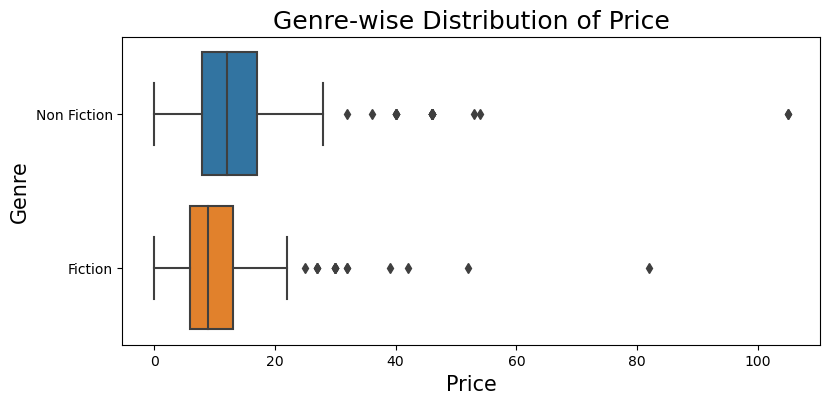

In [11]:
plt.figure(figsize=(9, 4))
sns.boxplot(data = bestseller_books, x = 'Price', y = 'Genre')
plt.title("Genre-wise Distribution of Price", fontsize = 18)
plt.ylabel("Genre", fontsize = 15)
plt.xlabel("Price", fontsize = 15)
plt.show()

Next up, a double bar plot is shown, they can come in handy in cases like these when we have two sets of data such as fictionand non-fictional books here. So, the data both of these sets can be visualized in ne plot.

#### Get the top N authors based on the number of reviews

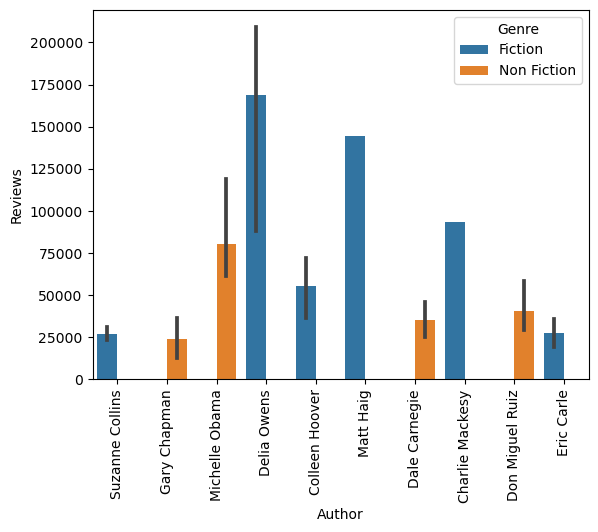

In [12]:
N = 10  # Choose the number of top authors you want to display
top_authors = bestseller_books.groupby('Author')['Reviews'].sum().nlargest(N).index

# Filter the DataFrame for the top authors
bestseller_books_top_authors = bestseller_books[bestseller_books['Author'].isin(top_authors)]

# Sort the DataFrame by 'Price' column in descending order
bestseller_books_price = bestseller_books_top_authors.sort_values("Price", ascending=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Create the bar plot using Seaborn
sns.barplot(x='Author', y='Reviews', data=bestseller_books_price, hue="Genre")

# Show the plot
plt.show()


In [13]:
bestseller_books_price

,Name,Author,User Rating,Reviews,Price,Year,Genre
137,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction
184,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2012,Fiction
232,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2013,Non Fiction
77,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2010,Non Fiction
127,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2011,Non Fiction
...,...,...,...,...,...,...,...
645,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2021,Fiction
391,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
495,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
343,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction


In [14]:
bestseller_books_price.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [15]:
bestseller_books_price.drop_duplicates()

,Name,Author,User Rating,Reviews,Price,Year,Genre
137,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2011,Fiction
184,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2012,Fiction
232,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2013,Non Fiction
77,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2010,Non Fiction
127,The 5 Love Languages: The Secret to Love That ...,Gary Chapman,4.7,3477,28,2011,Non Fiction
...,...,...,...,...,...,...,...
645,The Very Hungry Caterpillar,Eric Carle,4.9,47260,5,2021,Fiction
391,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction
495,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
343,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction


count    700.000000
mean      12.700000
std        9.915162
min        0.000000
25%        7.000000
50%       11.000000
75%       15.000000
max      105.000000
Name: Price, dtype: float64



<Axes: ylabel='Frequency'>

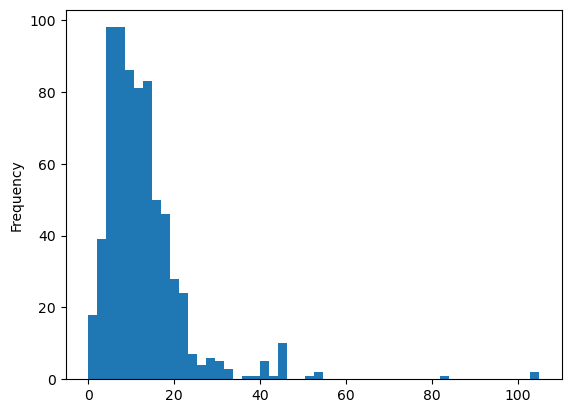

In [16]:
print(bestseller_books.Price.describe())
print()
bestseller_books.Price.plot(bins=50, kind='hist')

It is also possible to split data into ranges to get meaningful insightsful insights, here the Price values are divided into three ranges as shown using cut function from pandas and a new features called PriceRange is made. This is used to get a distribution of reviews depending on the price, and clearly low-priced books have the highest number of reviews.

In [17]:
# Cut the 'Price' into price ranges and assign the result to a new column 'PriceRange'
bestseller_books['PriceRange'] = pd.cut(bestseller_books['Price'], bins=3, labels=['low range <=$35', 'mid range<=$70', 'high range <=$150'])

# Group by 'PriceRange', calculate the mean of 'Reviews', and sort the values
price_reviews_mean = bestseller_books[['PriceRange', 'Reviews']].groupby(['PriceRange'], as_index=False).mean().sort_values(by='PriceRange', ascending=True)

print(price_reviews_mean)


          PriceRange       Reviews
0    low range <=$35  19687.931953
1     mid range<=$70   7258.857143
2  high range <=$150   5719.666667


(0.0, 50000.0)

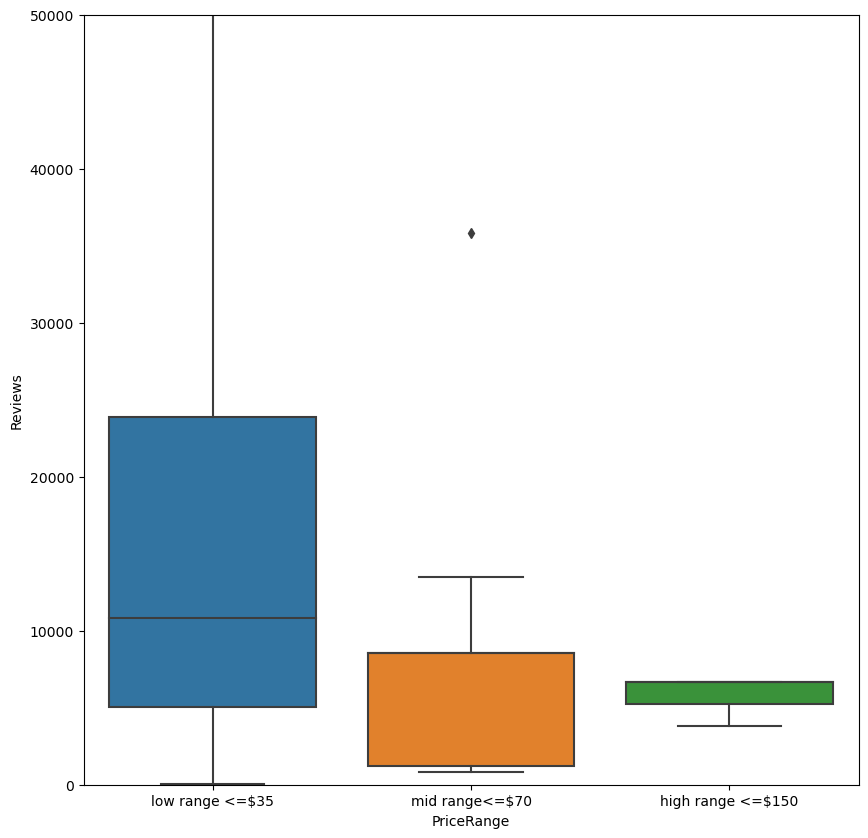

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x = bestseller_books['PriceRange'], y = bestseller_books['Reviews'])
plt.ylim(0, 50000)

No business can draw any assumptions with raw data, an exaustive aproach like EDA thus because an integral part before moving on to the modelling part of the work.